# Linear Regression Using Tensorflow

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

In [2]:
x_data = np.linspace(0.0,10.0,1000000)

In [3]:
noise = np.random.randn(len(x_data))

In [4]:
noise

array([-0.32028045,  0.34318293,  0.37806849, ..., -0.98355541,
       -0.18442314,  1.51775942])

In [5]:
#y = mx + b
#b=5

y_true = (0.5 * x_data) + 5 + noise

In [6]:
#X dataframe
x_df = pd.DataFrame(data=x_data,columns=['X Data'])

In [7]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [8]:
y_df.head()

,Y
0,4.679720
1,5.343188
2,5.378078
3,6.205209
4,5.966783


In [9]:
my_data = pd.concat([x_df,y_df],axis=1)

In [10]:
my_data.head()

,X Data,Y
0,0.00000,4.679720
1,0.00001,5.343188
2,0.00002,5.378078
3,0.00003,6.205209
4,0.00004,5.966783


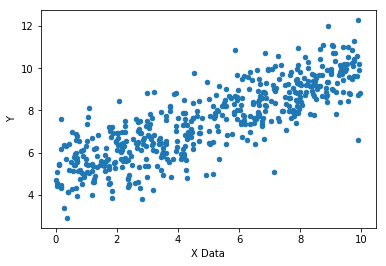

In [11]:
my_data.sample(n=500).plot(kind="scatter",x="X Data",y='Y')

In [12]:
batch_size = 8

In [13]:
m = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())

In [14]:
x_placeholder = tf.placeholder(tf.float32,shape=[batch_size])
y_placeholder = tf.placeholder(tf.float32,[batch_size])

In [15]:
y_model = m * x_placeholder + b

In [16]:
error = tf.reduce_sum(tf.square(y_placeholder - y_model))

In [17]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [18]:
init = tf.global_variables_initializer()

In [19]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 10000
    
    for i in range(batches):
        rand_idx = np.random.randint(len(x_data),size=batch_size)
        feed = {x_placeholder:x_data[rand_idx],y_placeholder:y_true[rand_idx]}
        
        sess.run(train,feed_dict=feed)
    
    model_m , model_b = sess.run([m,b])

In [20]:
model_m

0.5457912

In [21]:
model_b

4.9860325

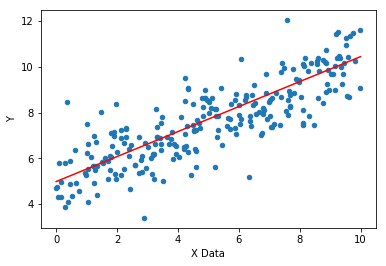

In [22]:
y_pred = x_data * model_m + model_b

my_data.sample(250).plot(kind="scatter",x='X Data',y="Y")
plt.plot(x_data,y_pred,'r')

## TF ESTIMATOR

In [23]:
feat_cols = [ tf.feature_column.numeric_column('x',shape=[1])]

In [24]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\sumit\\AppData\\Local\\Temp\\tmps55or5em', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000024A3737DEB8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data,y_true,test_size=0.3,random_state=1)

In [26]:
print(x_train.shape)
print(x_test.shape)

(700000,)
(300000,)


In [27]:
input_fn = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=None,shuffle=True)

In [28]:
train_input_fn = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=1000,shuffle=False)

In [29]:
test_input_fn = tf.estimator.inputs.numpy_input_fn({'x':x_test},y_test,batch_size=4,num_epochs=1000,shuffle=False)

In [30]:
#train the estimator

estimator.train(input_fn=input_fn,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\sumit\AppData\Local\Temp\tmps55or5em\model.ckpt.
INFO:tensorflow:loss = 282.47324, step = 1
INFO:tensorflow:global_step/sec: 859.776
INFO:tensorflow:loss = 16.6297, step = 101 (0.118 sec)
INFO:tensorflow:global_step/sec: 997.335
INFO:tensorflow:loss = 15.412226, step = 201 (0.100 sec)
INFO:tensorflow:global_step/sec: 1022.92
INFO:tensorflow:loss = 10.377851, step = 301 (0.098 sec)
INFO:tensorflow:global_step/sec: 1005.71
INFO:tensorflow:loss = 3.0634952, step = 401 (0.100 sec)
INFO:tensorflow:global_step/sec: 1028.17
INFO:tensorflow:loss = 6.764372, step = 501 (0.097 sec)
INFO:tensorflow:global_step/sec: 1028.19
INFO:tensorflow:loss = 2.7779164, step = 601 (0.097 sec)
INFO:tensorflow:global_step/sec

In [31]:
#evaluating 

train_metrics = estimator.evaluate(input_fn=train_input_fn,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-08-18-14:35:06
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\sumit\AppData\Local\Temp\tmps55or5em\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-08-18-14:35:07
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1604587, global_step = 1000, loss = 4.6418347
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\sumit\AppDa

In [32]:
test_metrics = estimator.evaluate(input_fn=test_input_fn,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-08-18-14:35:07
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\sumit\AppData\Local\Temp\tmps55or5em\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-08-18-14:35:08
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1680921, global_step = 1000, loss = 4.6723685
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\sumit\AppDa

In [33]:
print("train metrics: {}".format(train_metrics))
print("test_metrics: {}".format(test_metrics))

train metrics: {'average_loss': 1.1604587, 'loss': 4.6418347, 'global_step': 1000}
test_metrics: {'average_loss': 1.1680921, 'loss': 4.6723685, 'global_step': 1000}


In [34]:
#predictions
input_fn_pred = tf.estimator.inputs.numpy_input_fn({'x':np.linspace(0,10,10)},shuffle=False)

In [35]:
list(estimator.predict(input_fn=input_fn_pred))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\sumit\AppData\Local\Temp\tmps55or5em\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.2386737], dtype=float32)},
 {'predictions': array([4.8993587], dtype=float32)},
 {'predictions': array([5.560044], dtype=float32)},
 {'predictions': array([6.220729], dtype=float32)},
 {'predictions': array([6.8814144], dtype=float32)},
 {'predictions': array([7.542099], dtype=float32)},
 {'predictions': array([8.202785], dtype=float32)},
 {'predictions': array([8.863469], dtype=float32)},
 {'predictions': array([9.524155], dtype=float32)},
 {'predictions': array([10.184839], dtype=float32)}]

In [36]:
predictions=[]
for x in estimator.predict(input_fn=input_fn_pred):
   predictions.append(x['predictions'][0])

print(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\sumit\AppData\Local\Temp\tmps55or5em\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[4.2386737, 4.8993587, 5.560044, 6.220729, 6.8814144, 7.542099, 8.202785, 8.863469, 9.524155, 10.184839]


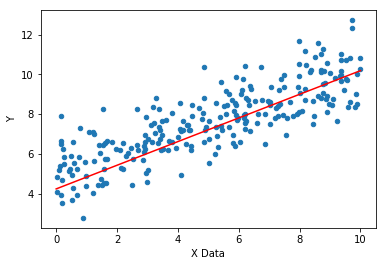

In [37]:
my_data.sample(250).plot(kind='scatter',x="X Data",y='Y')
plt.plot(np.linspace(0,10,10),predictions,'r')